In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def funcao_ativacao(potencial_ativacao_u):
    return potencial_ativacao_u >= 0

In [7]:
def plotar_fronteira(pesos, entradas, desejados):
    plt.style.use('ggplot')

    b, w1, w2 = pesos
    print("pesos:")
    print(b, w1, w2)
    x = b / w1
    y = b / w2
    d = y
    c = -y / x

    line_x_coords = np.array([0, x])
    print("coordenadas x:")
    print(line_x_coords)
    line_y_coords = c * line_x_coords + d
    print("coordenadas y:")
    print(line_y_coords)

    plt.plot(line_x_coords, line_y_coords)
    plt.scatter(entradas[:, 0], entradas[:, 1], c=desejados, s=75)
    plt.show()

In [8]:
def perceptron(iteracoes_maxima, erros, taxa_aprendizagem, entradas_x, desejados_d):
    ##Trata bias como um peso w0
    pesos_w = np.array([-.8649, .3192, .3129])
    ##Adiciona um coeficiente -1 para o bias na matriz de entradas
    np_entradas = np.c_[ (np.ones(entradas_x.shape[0]) * -1), entradas_x ]
    epoca = 1
    temErros = True
    while (epoca < iteracoes_maxima and temErros):
        saidas_y = funcao_ativacao(np.dot(np_entradas, pesos_w))
        erros_e = desejados_d - saidas_y
        pesos_w += taxa_aprendizagem * np.dot(erros_e, np_entradas)
        correspondencias = desejados_d == saidas_y
        erros_epoca = np.sum(correspondencias == 0)
        erros.append(erros_epoca)
        temErros = erros_epoca > 0
        if ((epoca == 1 or epoca % 5 == 0) or (not temErros)):
            print("época " + str(epoca))
            plotar_fronteira(pesos_w, entradas_x, desejados_d)
        if (temErros):
            epoca += 1
    return pesos_w, epoca, erros

época 1
pesos:
-0.7649 0.3192 0.3129
coordenadas x:
[ 0.         -2.39630326]
coordenadas y:
[-2.44455097  0.        ]


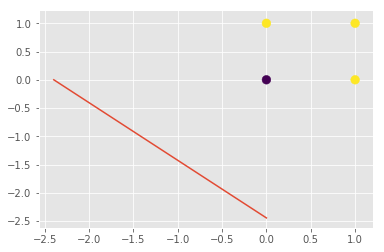

época 5
pesos:
-0.3649 0.3192 0.3129
coordenadas x:
[ 0.         -1.14317043]
coordenadas y:
[-1.16618728  0.        ]


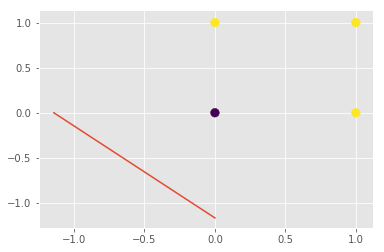

época 10
pesos:
0.0351 0.3192 0.3129
coordenadas x:
[ 0.          0.10996241]
coordenadas y:
[ 0.11217641  0.        ]


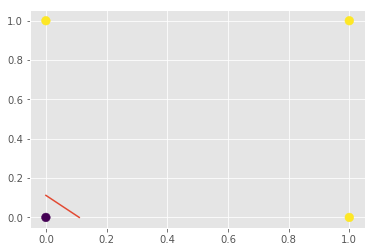

final:
pesos [ 0.0351  0.3192  0.3129]
10 épocas


In [5]:
np_desejados = np.array([0, 1, 1, 1])
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
pesos, epocas, erros = perceptron(iteracoes_maxima=500, erros=[], taxa_aprendizagem=0.1, entradas_x=entradas, desejados_d=np_desejados)
print("final:\npesos %s\n%s épocas" % (str(pesos), str(epocas)))

In [6]:
##Testa função de ativação com pesos finais
np_entradas = np.c_[ (np.ones(entradas.shape[0]) * -1), entradas ]
funcao_ativacao(np.dot(np_entradas, pesos))

array([False,  True,  True,  True], dtype=bool)